# Lab Work 1: Working with missing data
This excercise should give you some practice in working with missing data of different feature types

## Load the iris dataset with missing values into a dataframe 
File: datasets.zip/datasets/iris/data_someMissing.all

Hint: When data is missing, pandas might not be able to determine the proper type of columns by itself. Look carefully at the data types and act accordingly! You have different options to change the types of columns:
* When reading, have a look at [pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html), esp the parameter *na_filter*
* In memory, have a look at [dataframe.astype](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html) and the transformation functions [dataframe.apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) in combination with [pandas.to_numeric](https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html)

In [29]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('datasets/iris/data_someMissing.all', sep=' ', header=None, names=["sl", "sw", "pl", "pw", "class"], na_values='?')    

# Casting the columns to the correct data types
df.iloc[:, :4] = df.iloc[:, :4].astype('float64')
df['class'] = df['class'].astype('category')

df.info()
df.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   sl      149 non-null    float64 
 1   sw      149 non-null    float64 
 2   pl      149 non-null    float64 
 3   pw      148 non-null    float64 
 4   class   149 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


,sl,sw,pl,pw
count,149.00,149.00,149.00,148.00
mean,5.84,3.05,3.77,1.21
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.40,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


## Data Exploration Report

Dataset was loaded as matrix into analysis software. Statistical measures on the numerical values were computed. 

Intention was to get a first impression if the classes can be separated against each other. 

Further goal was to find out if there are outliers in the measurements.

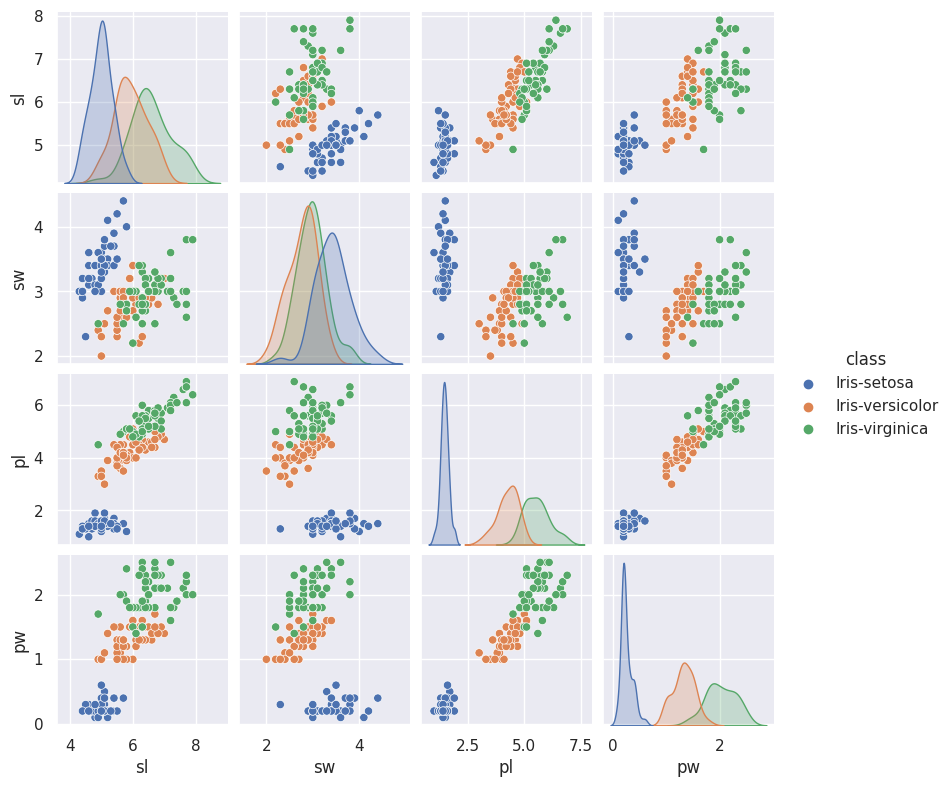

In [46]:
import seaborn as sns

sns.set(style="darkgrid")
sns.pairplot(df, hue="class", height=2)

#### Scatter plot assessment
A scatter plot of the features, colored by class type shows, how each feature might be separable against each other. When taking two features, the `Iris-setosa` is linearly separable, whereas the other two, `Iris-versicolor` and `Iris-virginica`, are not.

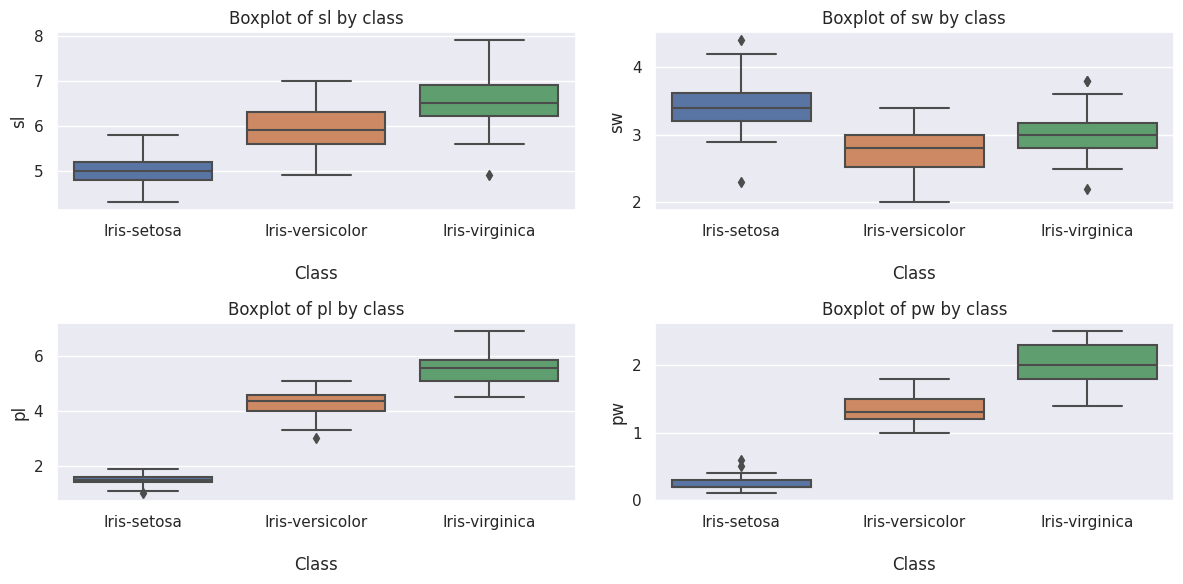

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i, column in enumerate(df.columns[:4]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x="class", y=column, data=df)
    plt.title(f'Boxplot of {column} by class')
    plt.xlabel('\nClass')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

#### Box plot asessment
A box plot matrix of the features grouped by class shows, that there are several outliers in the data. 

## Data Quality Report

After loading the dataset and renaming the columns, a simple `data.info()` overview points out the number of non-null values for each column.
Thus, the missing values for each column are as follows:

**Numerical values** 
* Sepal Length (float) – 1 missing
* Sepal Width (float) – 1 missing
* Petal Length (float) – 1 missing
* Petal Width (float) – 2 missing

**Categorial Values**
* Class name (String) – 1 missing

Consequently, 5 out of 150 lines have missing values. Upon further comparison with the original dataset the only missing numerical values are for the `Iris-setosa` class. The missing class can be used for testing. Here a domain expert should give the *potential true class value*.

The `na_values` parameter is used to filter all null values and put a `NaN` label where they are missing.

## Class differences

The above generated Scatterplot and Boxplot showcase the differences between the flower three classses - `Iris-setosa`, `Iris-versicolor` and `Iris-virginica`.

According to the data, the `Iris-setosa`, which is the main item of interest, has **shorter, but wider sepals and significantly smaller petals.**

In [32]:
for col in df.iloc[:, :4].columns:
    print(round(df.groupby('class', observed=True)[col].mean(),2))

class
Iris-setosa        4.99
Iris-versicolor    5.94
Iris-virginica     6.59
Name: sl, dtype: float64
class
Iris-setosa        3.43
Iris-versicolor    2.77
Iris-virginica     2.97
Name: sw, dtype: float64
class
Iris-setosa        1.46
Iris-versicolor    4.26
Iris-virginica     5.55
Name: pl, dtype: float64
class
Iris-setosa        0.25
Iris-versicolor    1.33
Iris-virginica     2.03
Name: pw, dtype: float64


An overview of the mean of the numerical values for each class of flower serves to point out that there is a noticeable difference in the *sepal* element and a significant difference in the *petal* element between the **Iris-setosa** and the other two classes. 

## Own Assessment
*Dataset is small in total size and incomplete, as missing values can be seen in all 5 columns of the dataframe.*

Missing values are recognized as NaN, using the `na_filter` and `na_values` parameters.

Columns have been renamed according to the lecture dataset, as follows:
- **sl** - sepal length
- **sw** - sepal width
- **pl** - petal length
- **pw** - petal width
- **class** - class name

Data in the first 4 columns has been casted to a *float* data type and last column to a *categorical data type*, using the [astype](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html) method after reading.

## What are your options to work with the missing values? 
* Remove rows with missing values altogether using [dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html).

* Replace the missing numerical values with statistical values, e.g. median, for the class using the [fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) and use the `ffill` or `bfill` method to ascertain the missing categorical values.

* Determine the missing values with an interpolation method using [interpolate](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html), based on the distances between values.

* Train a [classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to predict the missing categorical values. This approach assumes that there are no missing numerical values.

* A domain expert can best point out the missing class values.

## What is their difference with respect to the features of the dataset and the class associations? 
* Using `dropna` to remove rows with missing elements from the dataset may result in a loss of information if those rows contain valuable data for other features.
If the missing values are related to the class variable in some way, removing rows with missing values can lead to a biased and/or incomplete analysis, as it may exclude cases relevant to the class associations.

* Using `fillna` helps preserve all rows and columns from the original dataset, however it heavily depends on the strategy used. If a set bias is introduced, it can negatively affect class associations.

* Using `interpolate` aims to estimate missing values while maintaining the distribution and patterns present in the existing data. The impact on class associations heavily depends on the interpolation method being used.

* When using a rf_classifier (e.g., `Random Forest Classifier`) to predict missing class values, the key difference is that the rf_classifier learns the relationships between the features (numerical attributes) and the class labels from the existing data. It can make predictions based on these learned associations, ensuring that the predicted class values are consistent with the patterns observed in the training data. This approach leverages patterns in the data to impute missing class values, potentially improving the accuracy of the imputation compared to simple statistical methods like mode imputation.

* Should the domain expert be biased towards the missing values, the quality of the dataset may suffer significantly.

## Implement some of the options for the dataset
* check, how these options change the statistical values of
  * each feature
  * each class
* useful functions in pandas for this step
  * find out, if a value [is null](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html)
  * [removing data that null ](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html?highlight=dropna)
  * [fill null data with other value](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)
  * [replace values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

In [33]:
df_clean = df.copy()
df_clean.dropna(inplace=True)

#Fix the indeces
df_clean.reset_index(drop=True, inplace=True)
df_clean.head(20)

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,5.4,3.7,1.5,0.2,Iris-setosa
9,4.8,3.4,1.6,0.2,Iris-setosa


Using the `dropna()` method leads to obtaining a dataframe with no missing values, but fewer entries. A reset of the indeces is also needed through the `reset_index()` method.

Using this method may be useful if you have a small number of missing values in a dataset with a large number of entries. Any other use of this replacement strategy may compromise the accuracy of the resulting dataframe.

In [34]:
df_clean.describe().round(2)

,sl,sw,pl,pw
count,145.00,145.00,145.00,145.00
mean,5.87,3.04,3.84,1.23
std,0.82,0.43,1.74,0.75
min,4.40,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.40
50%,5.80,3.00,4.40,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


According to the statistical data presented by the ```describe()``` method, 5 from all 150 rows had incomplete data and were thus removed from the dataframe. 

In [35]:
df.describe().round(2)

,sl,sw,pl,pw
count,149.00,149.00,149.00,148.00
mean,5.84,3.05,3.77,1.21
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.40,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In comparing the modified dataframe with the original one there is a slight difference in the mean and standard deviation values. This strategy is best suited for large dataframes with few missing values per column, so as not to compromise the integrity of the original dataset.

___

The following code snippet illustrates how to calculate the missing values in a dataframe using the *median class values for every column*. The `fillna()` method with the `ffill` parameter is used to propagate the last valid observation forward to next valid.

In [36]:
# write in docs that it is possible to use ffill, but not recommended because 151 could be different from 150

# fill missing values with the mean for the specific class
df_fill = df.copy()
float_cols = df_fill.select_dtypes(include=['float64']).columns

# fill the missing float values with the mean of every column for the iris-setosa class
# df_fill[col].fillna(round(df_fill[df_fill['class'] == 'Iris-setosa'][col].mean(), 2), inplace=True)
for col in float_cols:
    df_fill[col].fillna(round(df_fill.groupby('class', observed=True)[col].transform('median'), 2), inplace=True)

df_fill.fillna(method='ffill', inplace=True)
df_fill.head(20)

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.5,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Filling the missing numerical values with the median of every column for each class and then doing a forward fill (`ffill`) to propagate the last valid observation forward to next valid one maintains the integrity of the dataset.

However, applying this strategy to a small or unordered dataframe may result in introducing a bias and negatively affect the class associations. 

* An example of such bias is when the number of observations in a class is very small. 
* Another instance of an issue with this strategy is when adding entries. Should the whole dataset be left unordered after the addition of new entries, the quality of the dataset may suffer.

In [37]:
df_fill.describe().round(2)

,sl,sw,pl,pw
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [38]:
df.describe().round(2)

,sl,sw,pl,pw
count,149.00,149.00,149.00,148.00
mean,5.84,3.05,3.77,1.21
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.40,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


Comparing this full dataframe with the original one results in negligible differences for the `50%` category.

___

In this code, two essential tasks are being performed: handling missing data in a dataset with numerical and categorical columns, and predicting missing class labels based on the available data.

We start by creating a copy of the original dataframe to avoid modifying the original data. We then use the `interpolate` method to fill in missing values in the first four columns of the dataframe. This method replaces missing values with interpolated values using a linear method in both forward and backward directions. This helps maintain the overall trend in the data while filling gaps.

In [39]:
df_interpolate = df.copy()

df_interpolate[df.columns[:4]] = df_interpolate[df.columns[:4]].interpolate(method='linear', limit_direction='both')
df_interpolate['class'] = df_interpolate['class'].interpolate(method='pad')

df_interpolate.head(20)

,sl,sw,pl,pw,class
0,5.1,3.50,1.4,0.2,Iris-setosa
1,4.9,3.00,1.4,0.2,Iris-setosa
2,4.7,3.20,1.3,0.2,Iris-setosa
3,4.6,3.10,1.5,0.2,Iris-setosa
4,5.0,3.60,1.4,0.2,Iris-setosa
5,5.4,3.90,1.7,0.4,Iris-setosa
6,4.6,3.40,1.6,0.3,Iris-setosa
7,5.0,3.40,1.5,0.2,Iris-setosa
8,4.4,2.90,1.4,0.2,Iris-setosa
9,4.9,3.10,1.5,0.1,Iris-setosa


In [40]:
df_interpolate.describe().round(2)

,sl,sw,pl,pw
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [41]:
df.describe().round(2)

,sl,sw,pl,pw
count,149.00,149.00,149.00,148.00
mean,5.84,3.05,3.77,1.21
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.40,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


Comparing this full dataframe with the original one results in negligible differences for the `mean` category.

___

The following code leverages a `Random Forest Classifier` to predict missing class values in a dataset where numerical values have already been determined as e.g. median values. It utilizes the known numerical and categorical values to train the classifier. The classifier predicts and assigns the missing class values, completing the dataset.

In [42]:
from sklearn.ensemble import RandomForestClassifier

df_model = df.copy()
# get first 4 columns from a previous dataframe
df_model.iloc[:, :4] = df_fill.iloc[:, :4]

# extract the rows in two dataframes: known and missing
missing_rows = df_model[df_model['class'].isna()]
known_rows = df_model[~df_model['class'].isna()]

X = known_rows.iloc[:, :-1]  # Features
y = known_rows['class'] # Target

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X, y)

# Fill the missing values with the predicted ones
predicted_classes = rf_classifier.predict(missing_rows.iloc[:, :-1])
df_model.loc[df_model['class'].isna(), 'class'] = predicted_classes

df_model.head(20)

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.5,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [43]:
df_model.describe().round(2)

,sl,sw,pl,pw
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [44]:
df.describe().round(2)

,sl,sw,pl,pw
count,149.00,149.00,149.00,148.00
mean,5.84,3.05,3.77,1.21
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.40,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


# Conclusion
In summary, there is no single universal way to handle missing values in a dataset. As already stated, each method works differently with regards to the dataset. A large dataset with few null entries can be modified either by removing null data or by filling it with other values by means of statistical values or interpolation. The same approach should not be applied to a different dataset, e.g. one with the same number of missing entries, but a vastly smaller size. \
Applying one or more of the above-mentioned strategies directly, without considering the structure of the dataset, may result in a bias or data redundancy, which serve to diminish the quality of the original dataset.